# Imports

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# EDA

In [69]:
df = pd.read_csv('creditcard.csv')
X = df[df.columns[0:-2]]
y = df['Class']
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Target Count

In [70]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

classes are highly imbalanced. There are a lot less fraud transactions compared to non fraud transactions

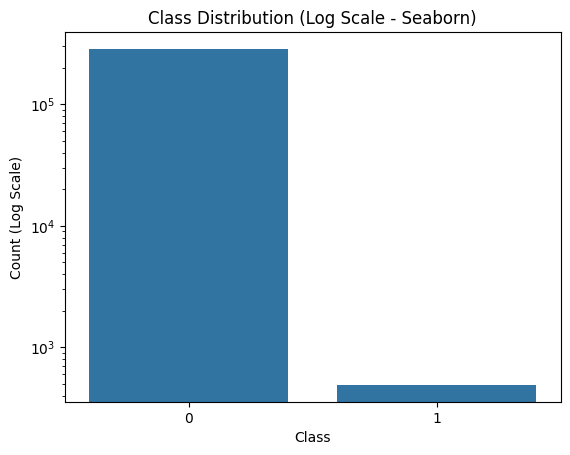

In [71]:
sns.countplot(x=y, data=df)
plt.yscale('log')
plt.title('Class Distribution (Log Scale - Seaborn)')
plt.xlabel('Class')
plt.ylabel('Count (Log Scale)')
plt.show()

# Model Training (lets try gradient boosting, maybe xgboost)

In [ ]:
rng = np.random.RandomState(0) #reproducible tests
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=rng, stratify=y)

#create estimator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
rf = RFECV(RandomForestClassifier(n_jobs=-1),cv=cv,n_jobs=-1)

#create pipe
pipeline = make_pipeline(StandardScaler(),
                         rf)
pipeline.fit(X_train, y_train)



# Metrics

In [ ]:
y_pred = pipeline.predict(X_test)
classification_report = classification_report(y_test, y_pred)
print(classification_report)